In [1010]:
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = [10, 5]

In [632]:
def random_sym(N, sd):
    """ Generate random symmetric matrix of independent normals """
    m = np.random.normal(0,sd,N*N).reshape(N,N)
    return np.tril(m) + np.tril(m).T
    
def barabasi_cov(P, m, sd = 1, eps=0.25):
    """ Generate precision and covariance matrix graph Barabasi random graph"""
    G = nx.generators.barabasi_albert_graph(P, m)
    p = nx.convert_matrix.to_numpy_array(G)
    m = random_sym(P, sd) * p

    # Make positive definite
    np.fill_diagonal(m, 0)
    x = np.abs(np.min(np.linalg.eigvals(m)))
    np.fill_diagonal(m, x + eps)
    return m, np.linalg.inv(m)

def partial_correlation(cov, i, j):
    """ Estimate partial correlation between i and j """
    s = np.sqrt(np.diag(cov))
    corr = cov / np.outer(s,s)
    om = np.linalg.inv(corr)
    return - om[i,j] / np.sqrt(om[i,i] * om[j,j])

def partial_correlation_ols(d, i, j, z):
    """ Estimate partial correlation between i and j conditional on z"""
    fit = lambda i: sm.OLS(data[:, [i]], data[:, z]).fit()
    return np.corrcoef(fit(i).resid, fit(j).resid)[0,1]

In [944]:
p, cov = barabasi_cov(50, 1, 1)

In [1001]:
data = np.random.multivariate_normal(np.zeros(50), cov, 100)

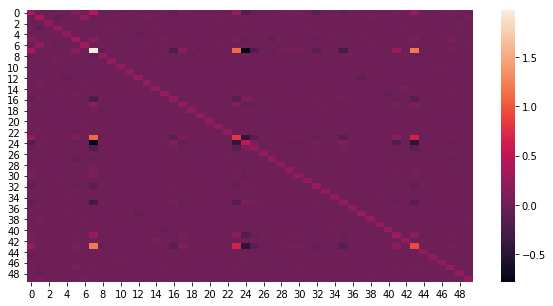

In [1002]:
sns.heatmap(cov)

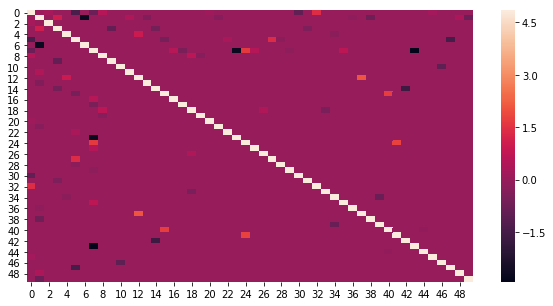

In [1003]:
sns.heatmap(p)

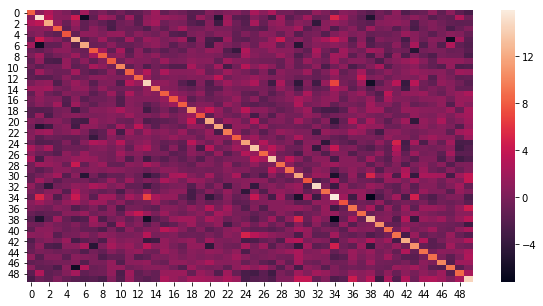

In [1004]:
sns.heatmap(np.linalg.inv(np.cov(data.T)))

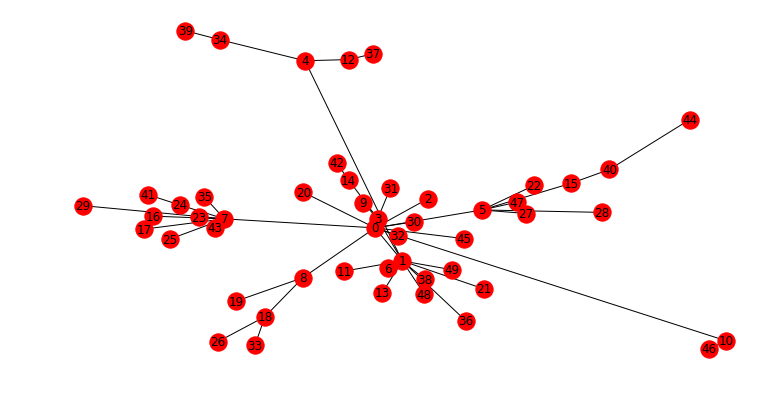

In [1017]:
G = nx.convert_matrix.from_numpy_array(np.round(np.abs(p), 3))
nx.draw(G, with_labels=True)

In [ ]:
# Pick a target variable (y) by looking at the above plot.
# Let the rest of the data be potential predictors

def pick(d, i):
    return d[:, i], np.delete(d, i, 1)

y, X = pick(data, 8)

In [ ]:
# Take a look at the results from OLS. 
# 1. Are they reasonable? 
# 2. Are there any spurious correlations? 

print(sm.OLS(y, X).fit().summary())

In [ ]:
# Given your perfect knowledge of the true DGP,
# pick a reduced form model and run OLS regression. 
# 1. Does this look like a better model? 

In [ ]:
# Clearly, we have a large graph, but we're only interested in 
# the part that is local to our target variable (y).
# Try to find this minimal model via model selection: 

# Use a Multiple Testing correction on P-Values with OLS
# Implement a stepwise algorithm with OLS
# Try Lasso!

In [1016]:
# Take a look at partial correlations between a pair of data points.
# See how this evolves as N (number of observations) grows.